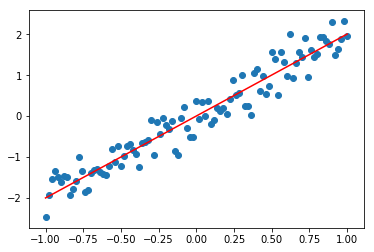

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

learning_rate = 0.01
training_epochs = 100

a = 2

# y = ax

x_train = np.linspace(-1,1,101)
y_train = a*x_train+np.random.randn(*x_train.shape)*0.33

# Solving linear regression

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

def model(X,w):
	return tf.multiply(X,w)
	
w = tf.Variable(0.0, name="weights")

y_model = model(X,w)
cost = tf.square(Y-y_model)

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epochs):
	for (x,y) in zip(x_train,y_train):
		sess.run(train_op,feed_dict={X: x, Y: y})
		
w_val = sess.run(w)

sess.close()
plt.scatter(x_train,y_train)
y_learned = x_train*w_val
plt.plot(x_train,y_learned,'r')
plt.show()